In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/microchips.csv', header=None)
data = data.sample(frac=1).reset_index(drop=True)
data.columns = ['x','y','label']

1. Use Logistic regression and mapFeatures from the previous exercise to construct nine
different classifiers, one for each of the degrees d 2 [1; 9], and produce a figure containing a
3  3 pattern of subplots showing the corresponding decision boundaries. Make sure that
you pass the argument C=10000.2

In [ ]:
def mapFeature(X1,X2,D): 
  one = np.ones([len(X1),1])
  Xe = np.c_[one,X1,X2] 
  for i in range(2,D+1):
    for j in range(0,i+1):
      Xnew = X1**(i-j)*X2**j 
      Xnew = Xnew.reshape(-1,1) 
      Xe = np.append(Xe,Xnew,1)
  return Xe

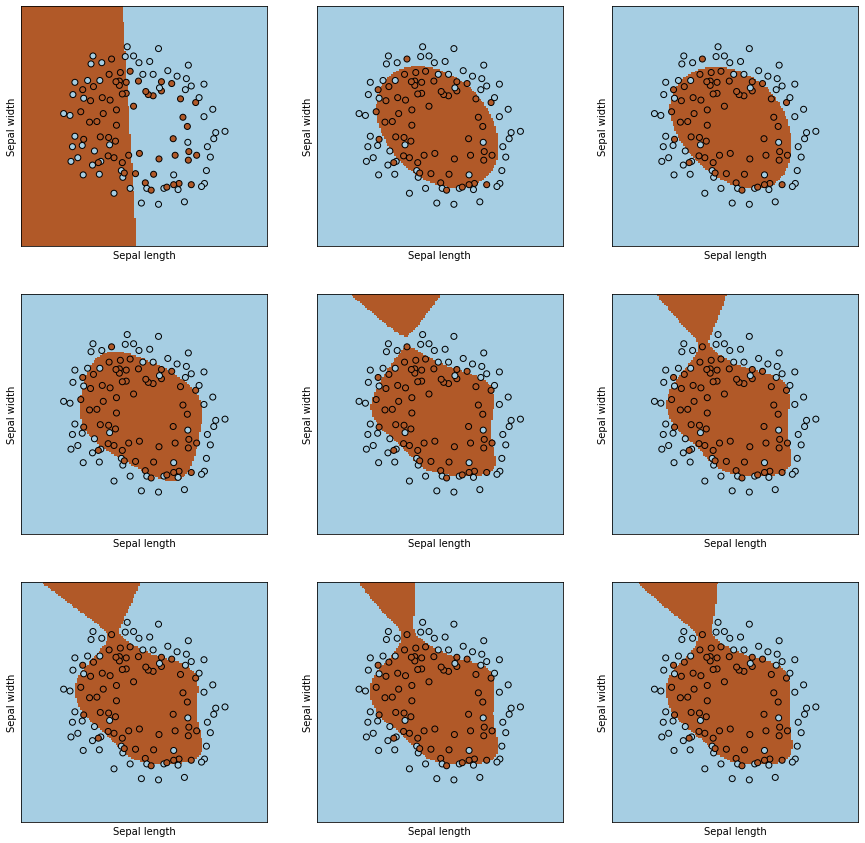

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    X_e = pd.DataFrame(mapFeature(np.array(data['x']),np.array(data['y']),i))
    logreg = LogisticRegression(C=1e8)
    logreg.fit(X_e, data['label'])

    X = data[['x','y']]
    Y = data['label']

    x_min, x_max = X['x'].min() - .5, X['x'].max() + .5
    y_min, y_max = X['y'].min() - .5, X['y'].max() + .5
    h = .02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    test_ = pd.DataFrame(mapFeature(points[:,0], points[:,1],i))
    Z = logreg.predict(test_)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 3, i)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X['x'], X['y'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.show()

2. Redo 1) but now use the regularization parameter C = 1. What is different than from the
step in 1)?

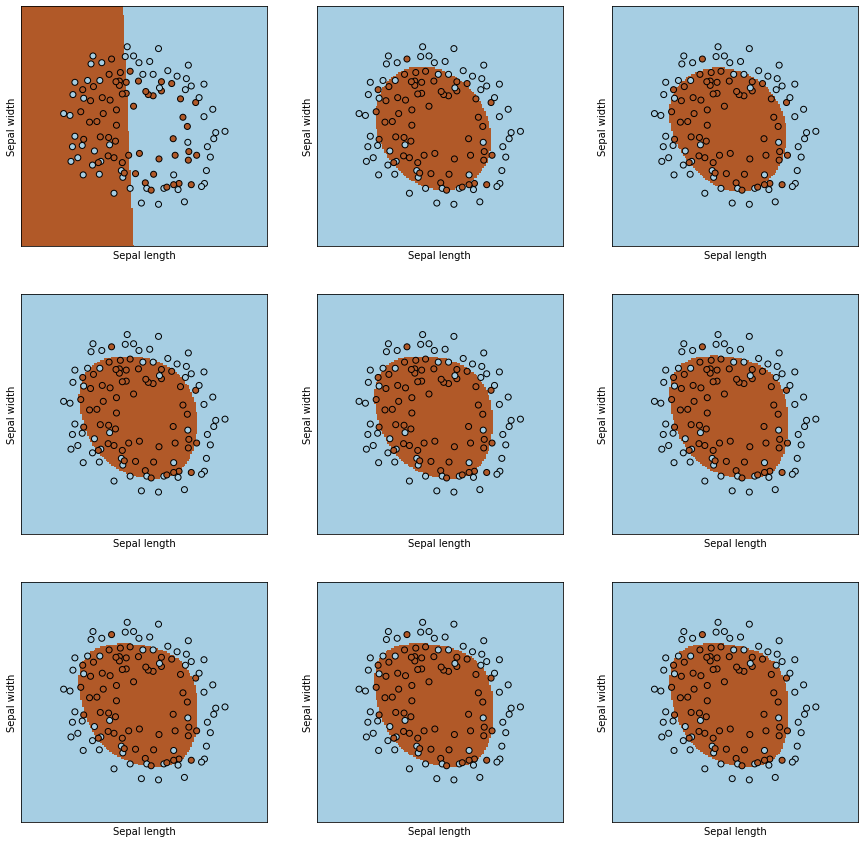

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(1,10):
    X_e = pd.DataFrame(mapFeature(np.array(data['x']),np.array(data['y']),i))
    logreg = LogisticRegression(C=1)
    logreg.fit(X_e, data['label'])

    X = data[['x','y']]
    Y = data['label']

    x_min, x_max = X['x'].min() - .5, X['x'].max() + .5
    y_min, y_max = X['y'].min() - .5, X['y'].max() + .5
    h = .02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    test_ = pd.DataFrame(mapFeature(points[:,0], points[:,1],i))
    Z = logreg.predict(test_)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 3, i)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X['x'], X['y'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.show()

When we do not use regularization, that is, when we take C = 1e8, the classifier is more sensitive to outliers and could not generalize the data more accurately (we have got a cone shaped region in the top of the plot).

When we use regularization, that is, when we take C = 1, the classifier was able to generalize the data more accurately. 

3. Finally, use cross-validation (in sklearn) to determine which model (i.e. degree) is best in
the case of the regularized and non-regularized models.

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for i in range(1,10):
    X_e = pd.DataFrame(mapFeature(np.array(data['x']),np.array(data['y']),i))
    logreg = LogisticRegression(C=1)
    scores = cross_val_score(logreg, X_e, data['label'], cv=5)
    cv_scores.append(np.mean(scores))
print("Degree that has best performance for regularized logistic regression : ", np.argmax(cv_scores)+1)
print("Best score recorded : ",round(np.max(cv_scores),4))

Degree that has best performance for regularized logistic regression :  4
Best score recorded :  0.7797


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for i in range(1,10):
    X_e = pd.DataFrame(mapFeature(np.array(data['x']),np.array(data['y']),i))
    logreg = LogisticRegression(C=1e8)
    scores = cross_val_score(logreg, X_e, data['label'], cv=5)
    cv_scores.append(np.mean(scores))
print("Degree that has best performance for non - regularized logistic regression : ", np.argmax(cv_scores)+1)
print("Best score recorded : ",round(np.max(cv_scores),4))

Degree that has best performance for non - regularized logistic regression :  3
Best score recorded :  0.821
